# test_1
Test circuit 1, shown below, contains resistors, independent and dependent current and voltage sources. This circuit is from [1], page 69, figure 4.8. The circuit was drawn in LTSpice [2] and the circuit nodes are labeled. For no particular reason, the reference note was chosen to be the center node of the circuit and is connected to the ground symbol.  

<img src="test_1.png" width="700"> 

The net list for the circuit was generated by LTSpice and show below:    
~~~
* test_1.asc
R2 1 2 1
R3 4 3 1
R4 2 5 2
V1 1 0 2
I1 4 0 9
V2 0 5 0
E1 3 0 1 4 2
F1 2 3 V2 2
R1 1 4 2
.op
.backanno
.end
~~~

This netlist is read into the Symbolic Modified Nodal Analysis [3] Jupyter notebook and the following circuit equations were generated.  
~~~
          ⎛1    1 ⎞   v₂   v₄    
I_V1 + v₁⋅⎜── + ──⎟ - ── - ── = 0    (1)
          ⎝R₂   R₁⎠   R₂   R₁    
          ⎛1    1 ⎞   v₅   v₁    
I_F1 + v₂⋅⎜── + ──⎟ - ── - ── = 0    (2)
          ⎝R₄   R₂⎠   R₄   R₂    
               v₃   v₄    
I_Ea1 - I_F1 + ── - ── = 0           (3)
               R₃   R₃    
   ⎛1    1 ⎞   v₃   v₁      
v₄⋅⎜── + ──⎟ - ── - ── = -I₁         (4)
   ⎝R₃   R₁⎠   R₃   R₁      
        v₂   v₅    
-I_V2 - ── + ── = 0                  (5)
        R₄   R₄    
v₁ = V₁                              (6)
-v₅ = V₂                             (7)
-ea₁⋅v₁ + ea₁⋅v₄ + v₃ = 0            (8)
I_F1 - I_V2⋅f₁ = 0                   (9)
~~~  
The equations represent the currents flowing into the nodes and voltage across V2 and the voltage at node 3. The notebook also generates text strings for SymPy [3] variable, matrices and component values, which are used below.

References:
1. D. E. Johnson, J. L. Hilburn, and J. R. Johnson, Basic Electric Circuit Analysis, Prentice-Hall, Inc. 1978
2. [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html)
3. [Symbolic Modified Nodal Analysis Jupyter notebook](https://github.com/Tiburonboy/Symbolic-modified-nodal-analysis)
4. [Sympy](https://www.sympy.org/en/index.html)

In [11]:
from sympy import *
import numpy as np
init_printing()

Copy the text strings generated by the Symbolic Modified Nodal Analysis [3] Jupyter notebook to the cell below.

In [12]:
I_V1, R2, V2, I1, I_F1, v1, I_Ea1, v2, I_V2, ea1, v5, v3, R3, f1, R4, V1, v4, R1 = symbols(' I_V1  R2  V2  I1  I_F1  v1  I_Ea1  v2  I_V2  ea1  v5  v3  R3  f1  R4  V1  v4  R1 ')
A = Matrix([[1/R2 + 1/R1, -1/R2, 0, -1/R1, 0, 1, 0, 0, 0], [-1/R2, 1/R4 + 1/R2, 0, 0, -1/R4, 0, 0, 0, 1], [0, 0, 1/R3, -1/R3, 0, 0, 0, 1, -1],
    [-1/R1, 0, -1/R3, 1/R3 + 1/R1, 0, 0, 0, 0, 0], [0, -1/R4, 0, 0, 1/R4, 0, -1, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, -1, 0, 0, 0, 0],
    [-ea1, 0, 1, ea1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, -f1, 0, 1]])
X = Matrix( [v1, v2, v3, v4, v5, I_V1, I_V2, I_Ea1, I_F1] )
Z = Matrix( [0, 0, 0, -I1, 0, V1, V2, 0, 0] )

Put the matrices in equation form and replace the component reference designators with element values.

In [13]:
 equ = Eq(A*X,Z)

## Symbolic solution

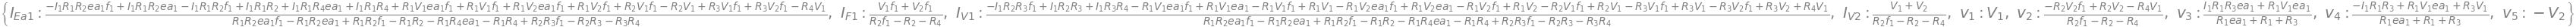

In [14]:
symbolic_solution = solve(equ,X)
symbolic_solution

In [15]:
left_side = list(symbolic_solution.keys())
right_side = list(symbolic_solution.values())

for i in range(len(symbolic_solution)):
    pprint(Eq(left_side[i],right_side[i]))

v₁ = V₁
     -R₂⋅V₂⋅f₁ + R₂⋅V₂ - R₄⋅V₁
v₂ = ─────────────────────────
          R₂⋅f₁ - R₂ - R₄     
     I₁⋅R₁⋅R₃⋅ea₁ + R₁⋅V₁⋅ea₁
v₃ = ────────────────────────
         R₁⋅ea₁ + R₁ + R₃    
     -I₁⋅R₁⋅R₃ + R₁⋅V₁⋅ea₁ + R₃⋅V₁
v₄ = ─────────────────────────────
            R₁⋅ea₁ + R₁ + R₃      
v₅ = -V₂
       -I₁⋅R₂⋅R₃⋅f₁ + I₁⋅R₂⋅R₃ + I₁⋅R₃⋅R₄ - R₁⋅V₁⋅ea₁⋅f₁ + R₁⋅V₁⋅ea₁ - R₁⋅V₁⋅f
I_V1 = ───────────────────────────────────────────────────────────────────────
                                                          R₁⋅R₂⋅ea₁⋅f₁ - R₁⋅R₂

₁ + R₁⋅V₁ - R₁⋅V₂⋅ea₁⋅f₁ + R₁⋅V₂⋅ea₁ - R₁⋅V₂⋅f₁ + R₁⋅V₂ - R₂⋅V₁⋅f₁ + R₂⋅V₁ - R
──────────────────────────────────────────────────────────────────────────────
⋅ea₁ + R₁⋅R₂⋅f₁ - R₁⋅R₂ - R₁⋅R₄⋅ea₁ - R₁⋅R₄ + R₂⋅R₃⋅f₁ - R₂⋅R₃ - R₃⋅R₄        

₃⋅V₁⋅f₁ + R₃⋅V₁ - R₃⋅V₂⋅f₁ + R₃⋅V₂ + R₄⋅V₁
──────────────────────────────────────────
                                          
           V₁ + V₂    
I_V2 = ───────────────
       R₂⋅f₁ - R₂ - R₄
        -I₁⋅R₁⋅R₂⋅ea₁

## Numeric solution
Substitue the element values into the equations and solve for unknown node voltages and currents.

In [16]:
# enter the element values
element_values = {R1:2,R2:1,R3:1,R4:2,V1:2,V2:0,I1:9,f1:2,ea1:2}
equ1a = equ.subs(element_values)
equ1a  # display the equations

⎡       3⋅v₁        v₄ ⎤       
⎢I_V1 + ──── - v₂ - ── ⎥       
⎢        2          2  ⎥       
⎢                      ⎥       
⎢            3⋅v₂   v₅ ⎥   ⎡0 ⎤
⎢I_F1 - v₁ + ──── - ── ⎥   ⎢  ⎥
⎢             2     2  ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢I_Ea1 - I_F1 + v₃ - v₄⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢     v₁        3⋅v₄   ⎥   ⎢-9⎥
⎢   - ── - v₃ + ────   ⎥   ⎢  ⎥
⎢     2          2     ⎥ = ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢           v₂   v₅    ⎥   ⎢2 ⎥
⎢   -I_V2 - ── + ──    ⎥   ⎢  ⎥
⎢           2    2     ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢          v₁          ⎥   ⎢0 ⎥
⎢                      ⎥   ⎢  ⎥
⎢         -v₅          ⎥   ⎣0 ⎦
⎢                      ⎥       
⎢  -2⋅v₁ + v₃ + 2⋅v₄   ⎥       
⎢                      ⎥       
⎣    I_F1 - 2⋅I_V2     ⎦       

Solve the equations for voltages and currents.

In [17]:
ans = solve(equ1a,X)
ans

In [18]:
for name, value in ans.items():
    print('{:s}: {:f}'.format(str(name),float(value)))
    #print(name,value)

v1: 2.000000
v2: 4.000000
v3: 6.285714
v4: -1.142857
v5: 0.000000
I_V1: 0.428571
I_V2: -2.000000
I_Ea1: -11.428571
I_F1: -4.000000


The node voltages and current through the sources are solved for. The Sympy generated solution matches the LTSpice results:
~~~
       --- Operating Point ---

V(1):	 2		voltage
V(2):	 4		voltage
V(4):	 -1.14286	voltage
V(3):	 6.28571	voltage
V(5):	 0		voltage
I(F1):	 -4		device_current
I(I1):	 9		device_current
I(R2):	 -2		device_current
I(R3):	 -7.42857	device_current
I(R4):	 2		device_current
I(R1):	 1.57143	device_current
I(E1):	 -11.4286	device_current
I(V1):	 0.428571	device_current
I(V2):	 -2		device_current
~~~
The results from LTSpice agree with the SymPy results.

Currents through the resistors must be calculated by hand. For example:

In [19]:
print('I(R1): {:f}'.format(float((ans[v1]-ans[v4])/element_values[R1])))

I(R1): 1.571429
